## Proyek UTS Multivariat 2

In [1]:
#import important packages

import pandas as pd
import io

In [2]:
from google.colab import files

In [3]:
#Load score_science.csv
uploaded1 = files.upload()

Saving score_science.csv to score_science (2).csv


In [4]:
#Load universities.csv
uploaded2 = files.upload()

Saving universities.csv to universities (1).csv


In [5]:
# Take a look at our first data
df_score_science = pd.read_csv(io.BytesIO(uploaded1['score_science.csv']))
df_score_science.head()

,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu
0,0,3321065,332,3331187,333,4,400,400,400,400,400,400,400,400
1,1,3211015,321,3611066,361,14,816,666,651,678,685,706,695,562
2,2,3721093,372,3551302,355,19,562,839,624,700,781,464,551,668
3,3,3321096,332,3551194,355,23,700,669,692,679,692,813,507,573
4,4,5211104,521,5211085,521,28,461,619,441,593,563,500,666,370


In [6]:
# Take a look at our second data
df_universities = pd.read_csv(io.BytesIO(uploaded2['universities.csv']))
df_universities.head()

,Unnamed: 0,id_university,university_name
0,0,111,UNIVERSITAS SYIAH KUALA
1,1,112,UNIVERSITAS MALIKUSSALEH
2,2,113,UNIVERSITAS TEUKU UMAR
3,3,114,UNIVERSITAS SAMUDRA
4,4,115,ISBI ACEH


In [7]:
#Drop kolom2 tak berguna pada kasus ini
df_score_science.drop(['Unnamed: 0', 'id_first_major', 'id_second_major', 'id_second_university'], axis = 1, inplace=True)
df_universities.drop('Unnamed: 0', axis = 1, inplace=True)

df_score_science.head()

,id_first_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu
0,332,4,400,400,400,400,400,400,400,400
1,321,14,816,666,651,678,685,706,695,562
2,372,19,562,839,624,700,781,464,551,668
3,332,23,700,669,692,679,692,813,507,573
4,521,28,461,619,441,593,563,500,666,370


In [8]:
#Copy to the new dfs

df1 = df_score_science.copy()
df2 = df_universities.copy()

df1 = df1.merge(df2, how='left', left_on='id_first_university', right_on='id_university')
df1.head()

,id_first_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu,id_university,university_name
0,332,4,400,400,400,400,400,400,400,400,332.0,INSTITUT TEKNOLOGI BANDUNG
1,321,14,816,666,651,678,685,706,695,562,321.0,UNIVERSITAS INDONESIA
2,372,19,562,839,624,700,781,464,551,668,372.0,UNIVERSITAS BRAWIJAYA
3,332,23,700,669,692,679,692,813,507,573,332.0,INSTITUT TEKNOLOGI BANDUNG
4,521,28,461,619,441,593,563,500,666,370,521.0,UNIVERSITAS PALANGKARAYA


In [9]:
# Beberapa universitas yang tidak ada lagi di df1
df3 = df1.copy()
df4 = df_universities.copy()

df3.merge(df4, how='inner', on='university_name')
df_universities[~df_universities.university_name.isin(df3.university_name)]

,id_university,university_name
4,115,ISBI ACEH
14,143,ISI PADANG PANJANG
31,335,ISBI BANDUNG
45,364,ISI YOGYAKARTA
65,613,ISI DENPASAR
83,913,ISBI TANAH PAPUA


In [10]:
#Hapus baris dengan univ 'ISI Surakarta'

df1 = df1[df1['university_name'] != 'ISI SURAKARTA']

In [11]:
#Check masih ada missing value?
df1.isnull().sum()

id_first_university    0
id_user                0
score_bio              0
score_fis              0
score_kim              0
score_kmb              0
score_kpu              0
score_kua              0
score_mat              0
score_ppu              0
id_university          1
university_name        1
dtype: int64

In [12]:
df1[df1['id_university'].isnull() == True]

,id_first_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu,id_university,university_name
22169,46,99120,552,496,647,642,661,696,633,512,NaN,NaN


In [13]:
#Drop missing value
df1.drop(labels=22169, axis=0, inplace=True)

#Check masih ada missing value?
df1.isnull().sum()

id_first_university    0
id_user                0
score_bio              0
score_fis              0
score_kim              0
score_kmb              0
score_kpu              0
score_kua              0
score_mat              0
score_ppu              0
id_university          0
university_name        0
dtype: int64

In [14]:
#Drop kolom2 kurang berguna pada kasus ini.
df1.drop(['id_first_university', 'id_user', 'id_university'], axis=1, inplace=True)

In [15]:
#Group by university_name and gunakan fungsi mean aggregation.
df_akhir = df1.groupby('university_name').mean()
df_akhir.columns = ['rata2_score_bio', 'rata2_score_fis', 'rata2_score_kim', 'rata2_score_kmb', 'rata2_score_kpu', 'rata2_score_kua', 'rata2_score_mat', 'rata2_score_ppu']
df_akhir.index.names = ['University Name (First Choice)']
df_akhir

,rata2_score_bio,rata2_score_fis,rata2_score_kim,rata2_score_kmb,rata2_score_kpu,rata2_score_kua,rata2_score_mat,rata2_score_ppu
University Name (First Choice),,,,,,,,
INSTITUT PERTANIAN BOGOR,542.374141,541.200051,546.775006,577.238738,581.141766,575.912191,529.929753,552.030288
INSTITUT TEKNOLOGI BANDUNG,588.152127,613.455158,633.718090,622.134374,633.620141,661.088154,575.340373,580.377104
INSTITUT TEKNOLOGI KALIMANTAN,504.540541,509.886486,512.870270,542.162162,539.297297,518.491892,511.443243,527.583784
INSTITUT TEKNOLOGI SEPULUH NOPEMBER,555.484407,569.538759,577.669142,597.676270,609.359073,616.893377,546.658153,565.906148
INSTITUT TEKNOLOGI SUMATERA,503.028846,502.309829,492.626068,520.476496,523.936966,514.467949,511.711538,514.726496
...,...,...,...,...,...,...,...,...
UNIVERSITAS TRUNOJOYO MADURA,494.654354,503.094987,486.332454,509.166227,506.746702,500.224274,508.282322,505.730871
UNIVERSITAS UDAYANA,537.807089,530.773388,536.433469,570.391052,573.579314,562.689134,523.998257,543.942475
"UPN ""VETERAN"" JAKARTA",529.994374,533.400141,530.263010,558.694796,557.826301,553.515471,523.381857,542.067511


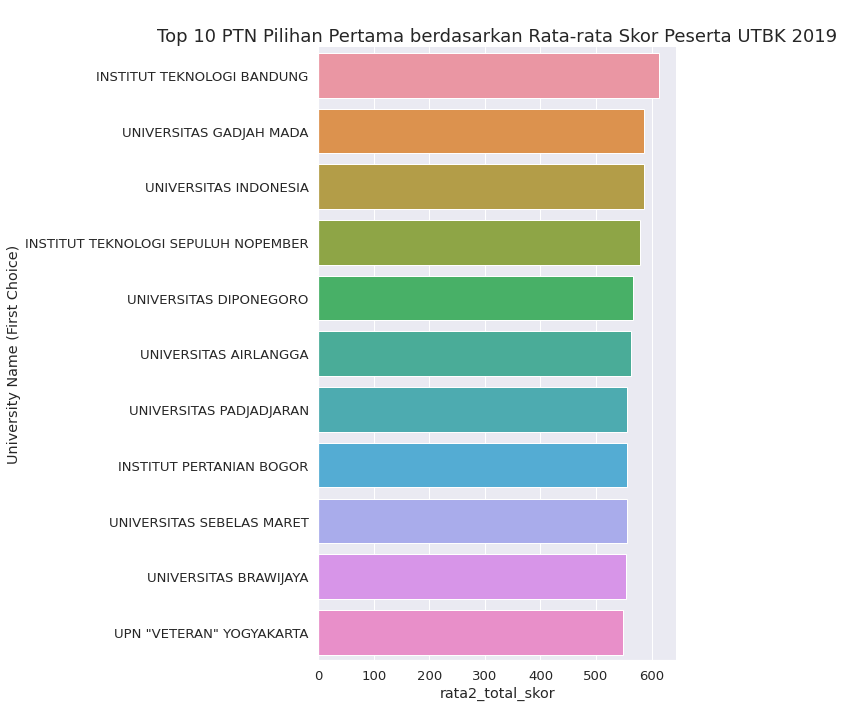

In [31]:
#Plot 1 : Top 10 PTN pilihan pertama berdasarkan skor UTBK 2019 Peserta
import matplotlib.pyplot as plt
import seaborn as sns

df5 = df_akhir.copy()
df5.reset_index(inplace = True)

df5['rata2_total_skor'] = (df5['rata2_score_bio'] + df5['rata2_score_fis'] + df5['rata2_score_kim'] + df5['rata2_score_kmb'] + df5['rata2_score_kpu'] + df5['rata2_score_kua'] + df5['rata2_score_mat'] + df5['rata2_score_ppu']) / 8
order_plot = df5.groupby('University Name (First Choice)')['rata2_total_skor'].mean().sort_values(ascending=False).index.values


g = sns.catplot(data=df5, x='rata2_total_skor',  y='University Name (First Choice)',kind='bar',ci=None, legend_out=False, order=order_plot[:11], orient = 'h')
g.fig.set_figheight(10)
g.fig.set_figwidth(50)
g.ax.set_title('\nTop 10 PTN Pilihan Pertama berdasarkan Rata-rata Skor Peserta UTBK 2019', fontsize = 18)
sns.set(font_scale = 1.2)

plt.show()

In [17]:
# Silhouette Score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cluster1 = df_akhir[['rata2_score_bio', 'rata2_score_fis', 'rata2_score_kim', 'rata2_score_kmb', 'rata2_score_kpu', 'rata2_score_kua', 'rata2_score_mat', 'rata2_score_ppu']].iloc[:,:].values
inertia1 = []
for n in range(2 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 5 ,max_iter=100, 
                        tol=0.0001,  random_state= 111))
    algorithm.fit(cluster1)
    inertia1.append(algorithm.inertia_)
    kmpp_predict = algorithm.predict(cluster1)
    score = silhouette_score(cluster1, kmpp_predict) # Silhouette coefficient
    print("For n_clusters = {}, silhouette score is {}".format(n, score))

For n_clusters = 2, silhouette score is 0.3923902091876524
For n_clusters = 3, silhouette score is 0.42093699618213776
For n_clusters = 4, silhouette score is 0.36278397958583153
For n_clusters = 5, silhouette score is 0.3757859135997303
For n_clusters = 6, silhouette score is 0.3208483218333807
For n_clusters = 7, silhouette score is 0.32029381748399416
For n_clusters = 8, silhouette score is 0.33851047364471765
For n_clusters = 9, silhouette score is 0.3395291325641966
For n_clusters = 10, silhouette score is 0.34242938048729044


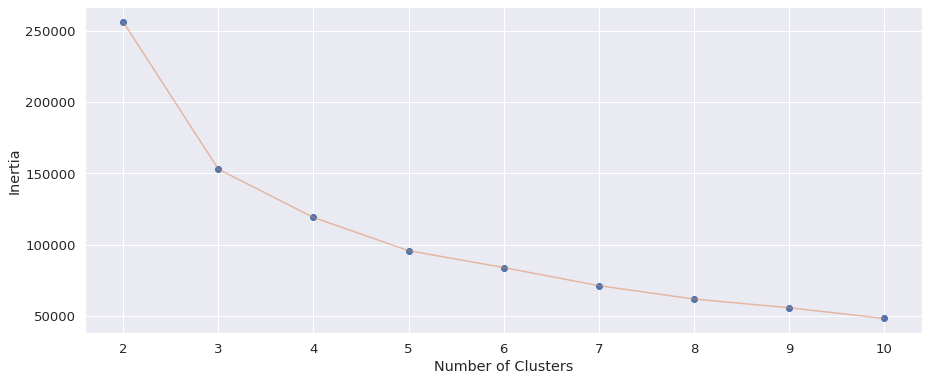

In [18]:
#Plot Elbow Method
import matplotlib.pyplot as plt 
import numpy as np

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , inertia1 , 'o')
plt.plot(np.arange(2 , 11) , inertia1 , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [19]:
# Model K-Means++
from sklearn.cluster import KMeans
algorithm1 = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 4 ,max_iter=100, 
                        tol=0.0001,  random_state= 42))
algorithm1.fit(df_akhir[['rata2_score_bio', 'rata2_score_fis', 'rata2_score_kim', 'rata2_score_kmb', 'rata2_score_kpu', 'rata2_score_kua', 'rata2_score_mat', 'rata2_score_ppu']])
kmpp_predict = algorithm1.predict(df_akhir[['rata2_score_bio', 'rata2_score_fis', 'rata2_score_kim', 'rata2_score_kmb', 'rata2_score_kpu', 'rata2_score_kua', 'rata2_score_mat', 'rata2_score_ppu']])


In [20]:
df_akhir['cluster']=kmpp_predict

In [21]:
# Lihat hasil klasterisasi!
df_akhir

,rata2_score_bio,rata2_score_fis,rata2_score_kim,rata2_score_kmb,rata2_score_kpu,rata2_score_kua,rata2_score_mat,rata2_score_ppu,cluster
University Name (First Choice),,,,,,,,,
INSTITUT PERTANIAN BOGOR,542.374141,541.200051,546.775006,577.238738,581.141766,575.912191,529.929753,552.030288,2
INSTITUT TEKNOLOGI BANDUNG,588.152127,613.455158,633.718090,622.134374,633.620141,661.088154,575.340373,580.377104,2
INSTITUT TEKNOLOGI KALIMANTAN,504.540541,509.886486,512.870270,542.162162,539.297297,518.491892,511.443243,527.583784,1
INSTITUT TEKNOLOGI SEPULUH NOPEMBER,555.484407,569.538759,577.669142,597.676270,609.359073,616.893377,546.658153,565.906148,2
INSTITUT TEKNOLOGI SUMATERA,503.028846,502.309829,492.626068,520.476496,523.936966,514.467949,511.711538,514.726496,0
...,...,...,...,...,...,...,...,...,...
UNIVERSITAS TRUNOJOYO MADURA,494.654354,503.094987,486.332454,509.166227,506.746702,500.224274,508.282322,505.730871,0
UNIVERSITAS UDAYANA,537.807089,530.773388,536.433469,570.391052,573.579314,562.689134,523.998257,543.942475,2
"UPN ""VETERAN"" JAKARTA",529.994374,533.400141,530.263010,558.694796,557.826301,553.515471,523.381857,542.067511,1


In [32]:
# Mana saja PTN yang termasuk cluster 0 ?

df_akhir[df_akhir['cluster'] == 0].reset_index()['University Name (First Choice)']

0                      INSTITUT TEKNOLOGI SUMATERA
1                      UNIVERSITAS BANGKA BELITUNG
2                       UNIVERSITAS BORNEO TARAKAN
3                             UNIVERSITAS HALUOLEO
4                UNIVERSITAS ISLAM NEGERI ALAUDDIN
5               UNIVERSITAS ISLAM NEGERI AR-RANIRY
6             UNIVERSITAS ISLAM NEGERI RADEN FATAH
7     UNIVERSITAS ISLAM NEGERI SULTAN SYARIF KASIM
8          UNIVERSITAS ISLAM NEGERI SUMATERA UTARA
9                UNIVERSITAS MARITIM RAJA ALI HAJI
10                    UNIVERSITAS NEGERI GORONTALO
11                     UNIVERSITAS NEGERI MAKASSAR
12                       UNIVERSITAS NEGERI MANADO
13                        UNIVERSITAS NEGERI MEDAN
14                       UNIVERSITAS NEGERI PADANG
15                        UNIVERSITAS PALANGKARAYA
16                               UNIVERSITAS PAPUA
17      UNIVERSITAS SEMBILAN BELAS NOVEMBER KOLAKA
18                      UNIVERSITAS SULAWESI BARAT
19                             

In [23]:
# Statistik deskriptif PTN cluster 0 

df_akhir[df_akhir['cluster'] == 0].drop('cluster', axis = 1).describe()

,rata2_score_bio,rata2_score_fis,rata2_score_kim,rata2_score_kmb,rata2_score_kpu,rata2_score_kua,rata2_score_mat,rata2_score_ppu
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,493.647895,492.382943,489.127405,499.421283,500.972891,497.418636,500.665395,507.942544
std,14.678896,21.949661,16.228099,16.992264,23.312018,20.581258,21.893818,23.925608
min,454.526316,423.000000,453.600000,464.000000,456.216667,438.375000,463.178571,476.000000
25%,489.327586,485.000000,481.568966,490.437500,484.470588,484.600000,489.105263,500.353365
50%,495.469388,501.831579,492.540816,498.357143,509.569231,501.695652,500.784314,505.042105
75%,502.000000,503.094987,496.600000,509.603448,515.545000,510.818182,510.750000,513.115000
max,521.400000,514.184615,529.000000,524.968421,535.000000,528.369231,557.250000,586.000000


In [36]:
# Mana saja PTN yang termasuk cluster 1 ?

df_akhir[df_akhir['cluster'] == 1].reset_index()['University Name (First Choice)']

0                     INSTITUT TEKNOLOGI KALIMANTAN
1                               UNIVERSITAS ANDALAS
2                              UNIVERSITAS BENGKULU
3                          UNIVERSITAS CENDERAWASIH
4                            UNIVERSITAS HASANUDDIN
5                  UNIVERSITAS ISLAM NEGERI JAKARTA
6                   UNIVERSITAS ISLAM NEGERI MALANG
7     UNIVERSITAS ISLAM NEGERI SUNAN AMPEL SURABAYA
8       UNIVERSITAS ISLAM NEGERI SUNAN GUNUNG DJATI
9           UNIVERSITAS ISLAM NEGERI SUNAN KALIJAGA
10               UNIVERSITAS ISLAM NEGERI WALISONGO
11                                UNIVERSITAS JAMBI
12                               UNIVERSITAS JEMBER
13                   UNIVERSITAS JENDERAL SOEDIRMAN
14                              UNIVERSITAS KHAIRUN
15                    UNIVERSITAS LAMBUNG MANGKURAT
16                              UNIVERSITAS LAMPUNG
17                         UNIVERSITAS MALIKUSSALEH
18                              UNIVERSITAS MATARAM
19          

In [25]:
# Statistik deskriptif PTN cluster 1 

df_akhir[df_akhir['cluster'] == 1].drop('cluster', axis = 1).describe()

,rata2_score_bio,rata2_score_fis,rata2_score_kim,rata2_score_kmb,rata2_score_kpu,rata2_score_kua,rata2_score_mat,rata2_score_ppu
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,516.284552,516.884686,519.341339,539.148692,542.172460,536.438565,516.042152,526.135203
std,12.084868,8.932859,11.659937,13.190847,12.304801,12.891500,11.353748,12.634854
min,473.333333,497.678261,495.661088,501.906250,516.283422,515.301965,450.333333,477.437500
25%,508.473684,509.012658,512.870270,530.821192,532.051020,526.095652,513.202532,521.653422
50%,518.267206,518.127737,519.820383,539.172932,541.873418,535.928776,517.648840,526.891304
75%,525.451133,523.746544,525.882488,550.154378,553.108749,548.612789,520.591429,535.920000
max,541.036496,535.270588,548.906250,563.928000,568.500000,561.841014,535.320000,542.620584


In [34]:
# Mana saja PTN yang termasuk cluster 2 ?

df_akhir[df_akhir['cluster'] == 2].reset_index()['University Name (First Choice)']

0                INSTITUT PERTANIAN BOGOR
1              INSTITUT TEKNOLOGI BANDUNG
2     INSTITUT TEKNOLOGI SEPULUH NOPEMBER
3                   UNIVERSITAS AIRLANGGA
4                   UNIVERSITAS BRAWIJAYA
5                  UNIVERSITAS DIPONEGORO
6                 UNIVERSITAS GADJAH MADA
7                   UNIVERSITAS INDONESIA
8                 UNIVERSITAS PADJADJARAN
9               UNIVERSITAS SEBELAS MARET
10                    UNIVERSITAS UDAYANA
11               UPN "VETERAN" YOGYAKARTA
Name: University Name (First Choice), dtype: object

In [27]:
# Statistik deskriptif PTN cluster 2 

df_akhir[df_akhir['cluster'] == 2].drop('cluster', axis = 1).describe()

,rata2_score_bio,rata2_score_fis,rata2_score_kim,rata2_score_kmb,rata2_score_kpu,rata2_score_kua,rata2_score_mat,rata2_score_ppu
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,552.072846,555.358100,566.281047,585.904732,591.767248,594.443335,538.987273,556.919271
std,16.880969,22.845072,28.256947,17.621852,19.365154,29.221232,14.555248,10.805033
min,529.827566,530.773388,536.433469,565.797136,573.208234,562.689134,523.998257,543.942475
25%,540.063053,541.699987,546.432455,572.990501,578.472214,574.271811,529.313705,550.954233
50%,547.185901,543.861507,557.267638,579.609753,582.810199,583.333976,533.784319,552.752031
75%,559.904921,570.056677,580.734946,599.248925,609.534158,617.216745,547.461975,565.835210
max,588.152127,613.455158,633.718090,622.134374,633.620141,661.088154,575.340373,580.377104


Text(0, 0.5, 'Rata-rata Skor Kemampuan IPA')

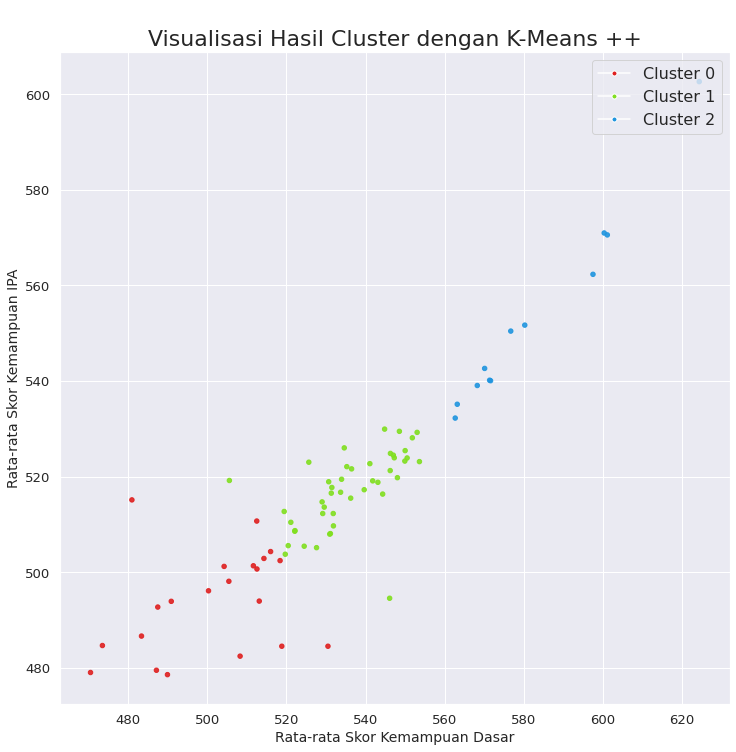

In [30]:
# Plot 2 : Visualisasi Hasil Cluster dengan Metode K-Means ++ 

df_akhir['rata2_total_skor_ipa'] = (df_akhir['rata2_score_bio'] + df_akhir['rata2_score_fis'] + df_akhir['rata2_score_kim'] + df_akhir['rata2_score_mat']) / 4
df_akhir['rata2_total_skor_dasar'] = (df_akhir['rata2_score_kmb'] + df_akhir['rata2_score_kpu'] + df_akhir['rata2_score_kua'] + df_akhir['rata2_score_ppu']) / 4

centroids = algorithm1.cluster_centers_
X_centroids = [x[0] for x in centroids] 
y_centroids = [y[1] for y in centroids]

# Tambahkan sebagai kolom baru di dataframe
df_akhir['X_centroids'] = df_akhir['cluster'].map({0:X_centroids[0], 1:X_centroids[1], 2:X_centroids[2]})
df_akhir['y_centroids'] = df_akhir['cluster'].map({0:y_centroids[0], 1:y_centroids[1], 2:y_centroids[2]})

## Definisikan warnanya
colors = ['#DF2020', '#81DF20', '#2095DF']
df_akhir['centroid_colors'] = df_akhir['cluster'].map({0:colors[0], 1:colors[1], 2:colors[2]})

from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(12,12))

# plot data
plt.scatter(df_akhir['rata2_total_skor_dasar'], df_akhir['rata2_total_skor_ipa'], c=df_akhir['centroid_colors'], alpha = 0.9, s=20)

#Legend dari plot
legends = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=marker_color, markersize=5) for i, marker_color in enumerate(colors)]

# plot legend
plt.legend(handles=legends, loc='upper right', fontsize = 16)


plt.title('\nVisualisasi Hasil Cluster dengan K-Means ++', loc='center', fontsize=22)
plt.xlabel('Rata-rata Skor Kemampuan Dasar', fontsize = 14)
plt.ylabel('Rata-rata Skor Kemampuan IPA', fontsize = 14)